# Catan RL Agent Demo

This notebook demonstrates the Catan reinforcement learning environment with agents.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import RegularPolygon, Circle
import numpy as np
from game_state import GameState
from action_manager import ActionManager
from agents import RandomAgent, HumanAgent
from play_game import play_game

%matplotlib inline

## 1. Create a New Game

In [2]:
# Initialize game with 4 players
game = GameState(num_players=4)
action_mgr = ActionManager(game)

print(f"Game Phase: {game.phase}")
print(f"Current Player: {game.current_player.name}")
print(f"Number of tiles: {len(game.board.tiles)}")
print(f"Robber on tile: {game.robber_tile_id}")

Game Phase: GamePhase.SETUP
Current Player: Player 0
Number of tiles: 19
Robber on tile: 14


## 2. Visualize Initial Board State

In [3]:
import game_visualization
import matplotlib.pyplot as plt

def plot_game_state(game, figsize=(14, 12)):
    """Plot Catan game state using the fixed visualization library."""
    fig, ax = plt.subplots(figsize=figsize)
    
    # Use the centralized, fixed plotting logic
    game_visualization.plot_board(game.board, ax=ax, show_legend=True)
    
    # Title with game info
    phase_text = game.phase.name
    turn_text = f"Turn {game.turn_number}" if game.phase.name == "MAIN" else "Setup Phase"
    current_player = game.current_player.name
    ax.set_title(f'Catan Board - {turn_text} - {phase_text}\n' +
                 f'Current: {current_player}', 
                 fontsize=18, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

In [4]:
# Reload the visualization module to get latest changes
import importlib
importlib.reload(game_visualization)

<module 'game_visualization' from 'c:\\Users\\1\\Documents\\Projects\\catanRL\\game_visualization.py'>

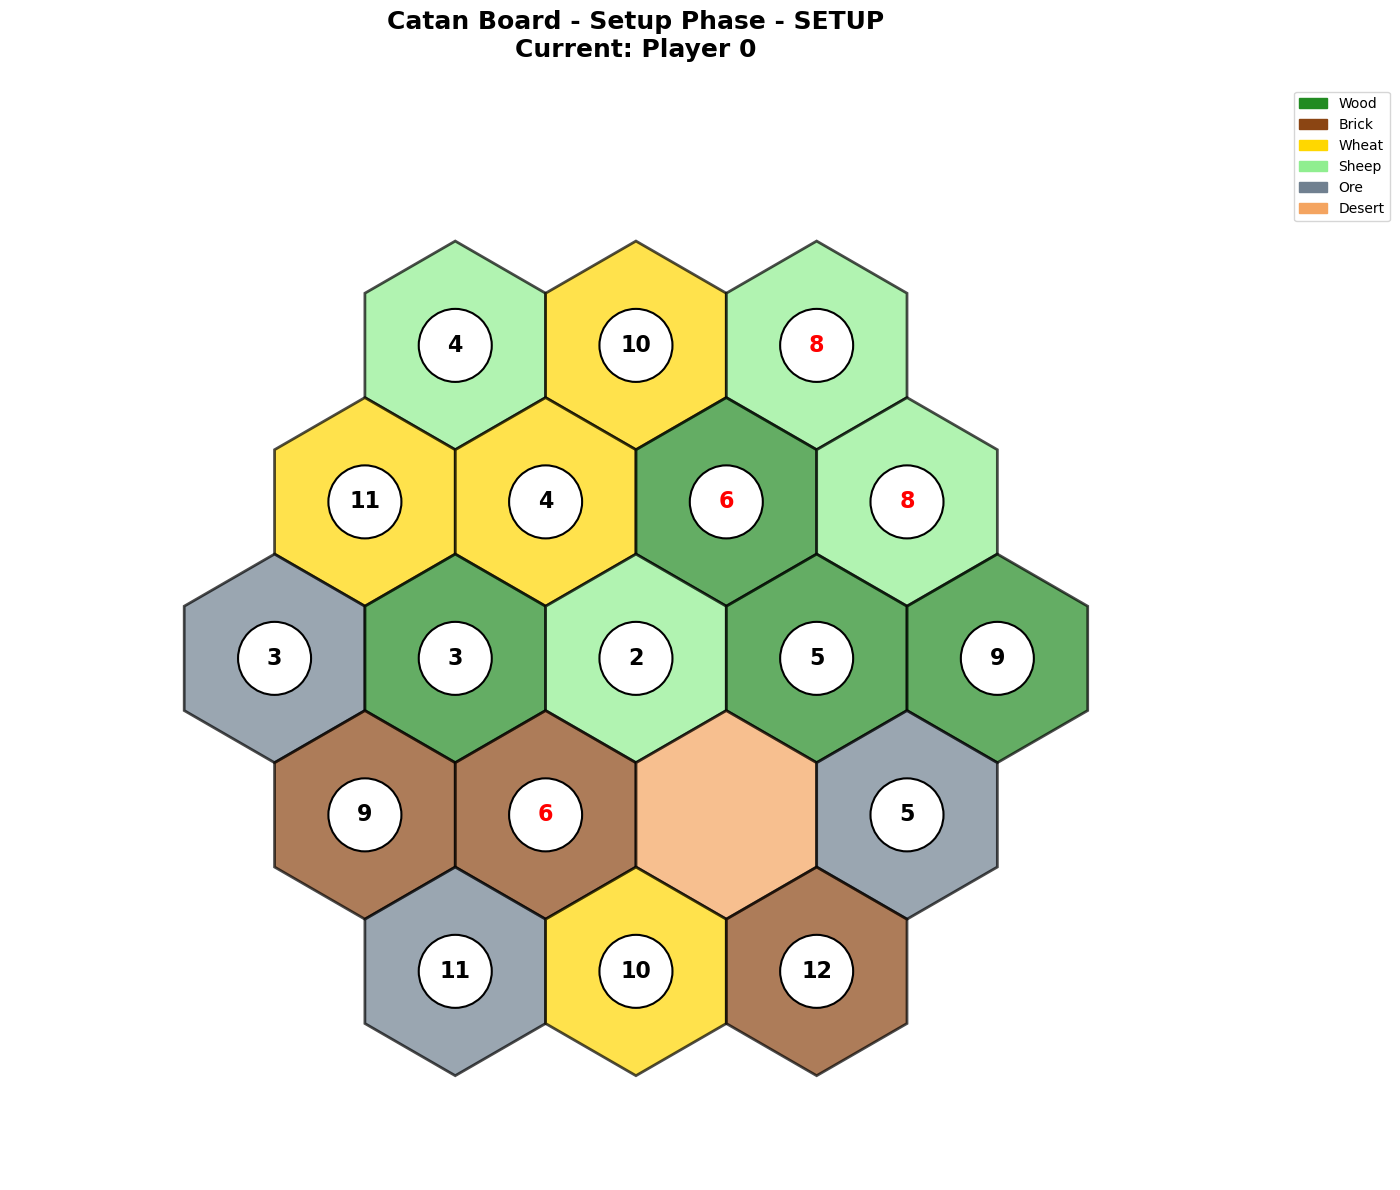

In [5]:
# Plot the game state
plot_game_state(game)
plt.show()

## 3. Test Manual Actions

Let's manually place some settlements and roads during setup.

In [6]:
# Get legal actions for current player
legal_actions = action_mgr.get_legal_actions(game.current_player.player_id)

print(f"Legal actions for {game.current_player.name} ({len(legal_actions)}):")
for i, action in enumerate(legal_actions[:10]):  # Show first 10
    print(f"  {i}: {action}")

Legal actions for Player 0 (54):
  0: BUILD_SETTLEMENT at vertex 0
  1: BUILD_SETTLEMENT at vertex 1
  2: BUILD_SETTLEMENT at vertex 2
  3: BUILD_SETTLEMENT at vertex 3
  4: BUILD_SETTLEMENT at vertex 4
  5: BUILD_SETTLEMENT at vertex 5
  6: BUILD_SETTLEMENT at vertex 6
  7: BUILD_SETTLEMENT at vertex 7
  8: BUILD_SETTLEMENT at vertex 8
  9: BUILD_SETTLEMENT at vertex 9


Action executed: BUILD_SETTLEMENT at vertex 0
Success: True


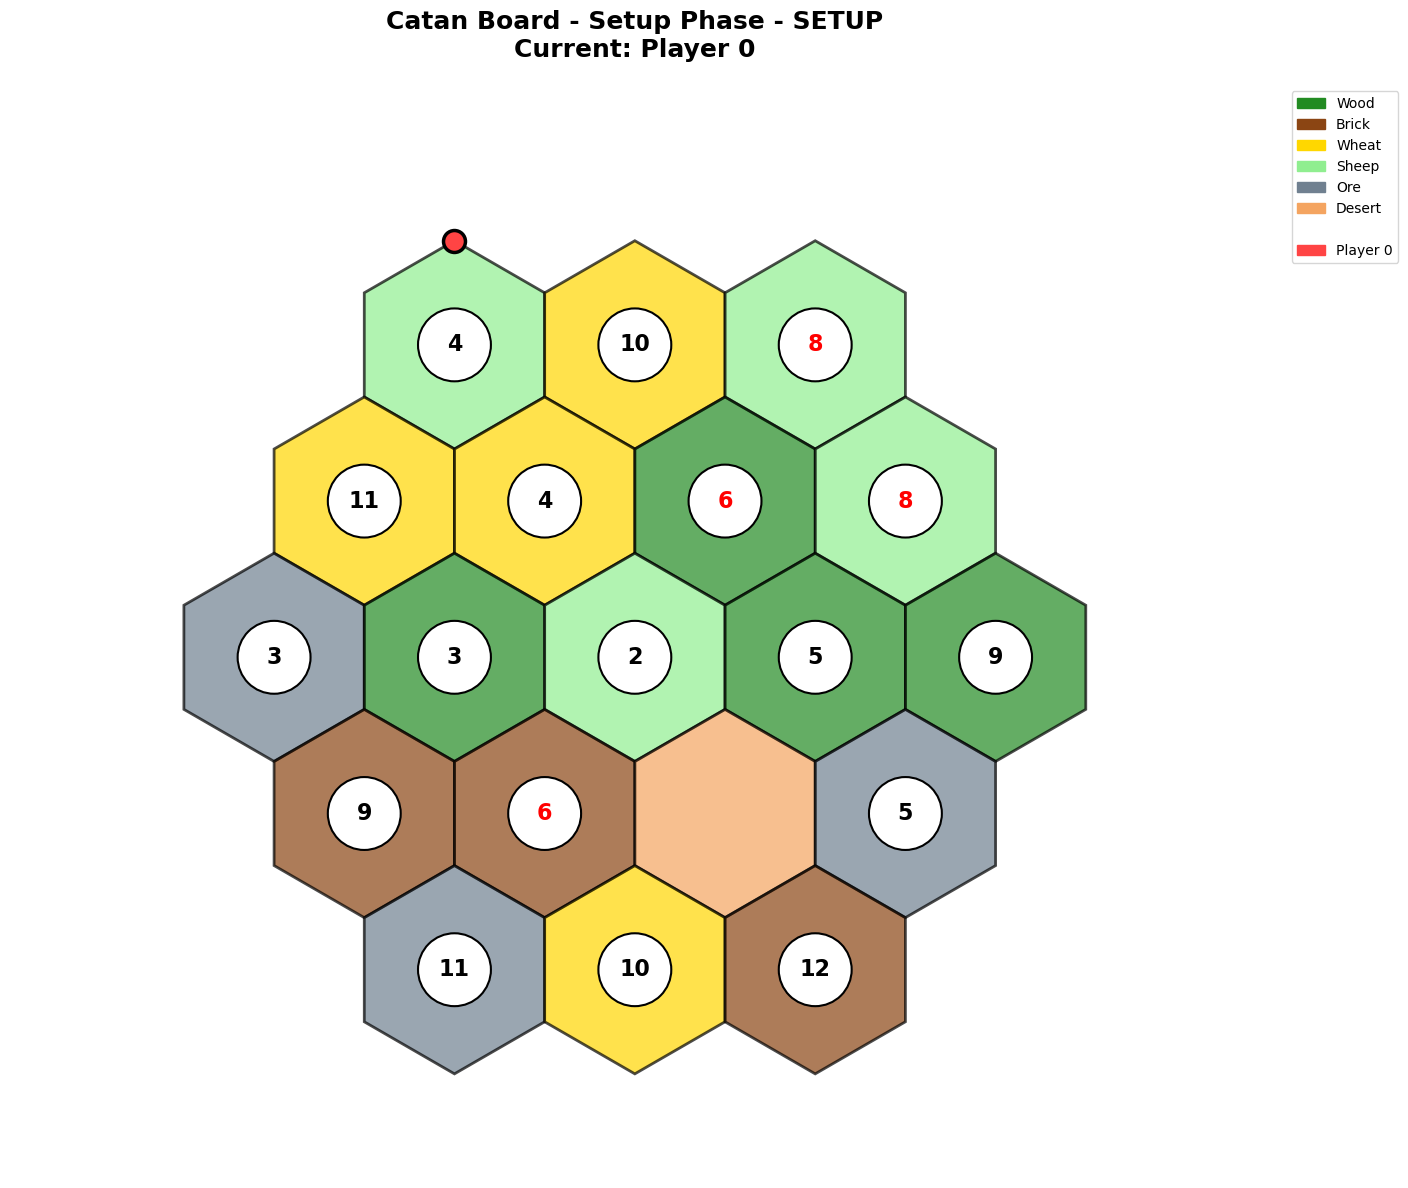

In [7]:
# Execute first legal action (place a settlement)
if legal_actions:
    action = legal_actions[0]
    success = action_mgr.execute_action(game.current_player.player_id, action)
    print(f"Action executed: {action}")
    print(f"Success: {success}")
    
    # Visualize updated board
    plot_game_state(game)
    plt.show()

## 4. Run Automated Game with Random Agents

In [8]:
# Reload modules to get latest changes
import importlib
import play_game
importlib.reload(play_game)
from play_game import play_game

In [9]:
# Create random agents
agents = [
    RandomAgent(0, "Alice"),
    RandomAgent(1, "Bob"),
    RandomAgent(2, "Charlie"),
    RandomAgent(3, "Diana"),
]

# Play a game
winner, game_result = play_game(agents, max_turns=50, verbose=True)

CATAN GAME START
Players: Alice (Player 0), Bob (Player 1), Charlie (Player 2), Diana (Player 3)

  Action: ROLL_DICE
  Action: END_TURN

--- Turn 2: Bob ---
VP: 2, Resources: 3
  Action: ROLL_DICE
  Action: BUY_DEVELOPMENT_CARD
  Action: END_TURN

--- Turn 3: Charlie ---
VP: 2, Resources: 1
  Action: ROLL_DICE
  Action: END_TURN

--- Turn 4: Diana ---
VP: 2, Resources: 3
  Action: ROLL_DICE
  Action: MOVE_ROBBER to tile 18
  Action: END_TURN

--- Turn 5: Alice ---
VP: 2, Resources: 4
  Action: ROLL_DICE
  Action: BUILD_ROAD on edge (41, 45)
  Action: END_TURN

--- Turn 6: Bob ---
VP: 2, Resources: 2
  Action: ROLL_DICE
  Action: END_TURN

--- Turn 7: Charlie ---
VP: 2, Resources: 2
  Action: ROLL_DICE
  Action: END_TURN

--- Turn 8: Diana ---
VP: 2, Resources: 3
  Action: ROLL_DICE
  Action: END_TURN

--- Turn 9: Alice ---
VP: 2, Resources: 3
  Action: ROLL_DICE
  Action: BUILD_ROAD on edge (12, 8)
  Action: END_TURN

--- Turn 10: Bob ---
VP: 2, Resources: 6
  Action: ROLL_DICE
  Acti

## 5. Visualize Game Result

Now we can visualize the final state of the game that just completed!

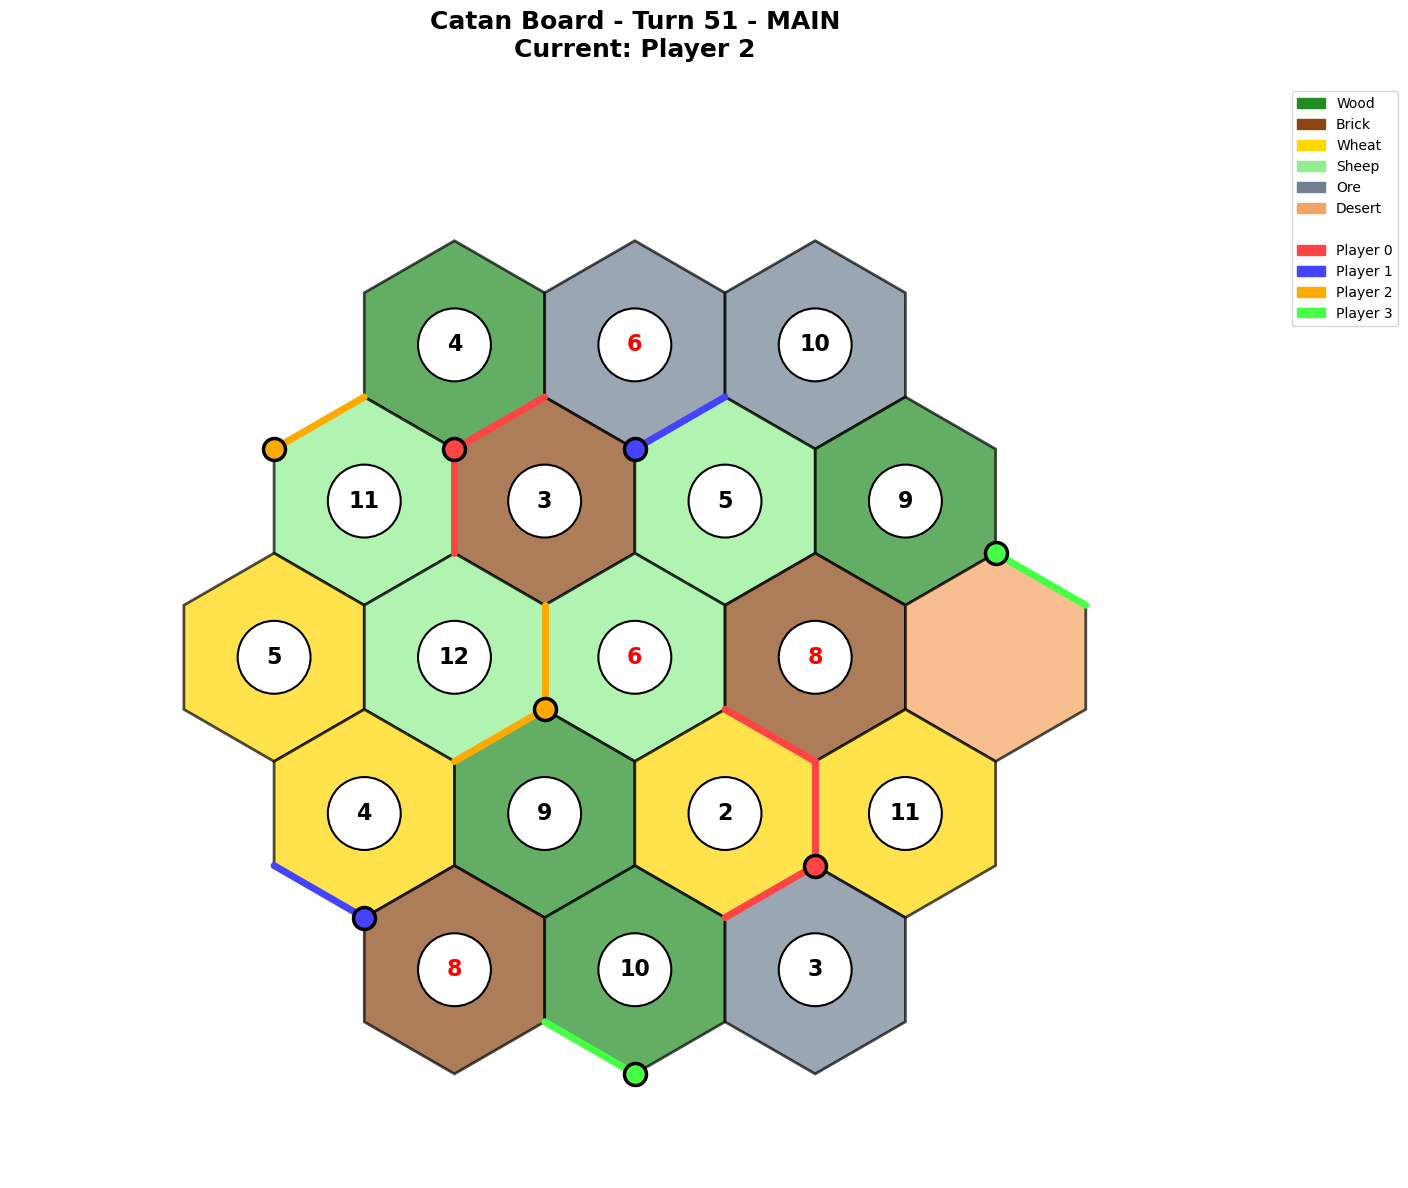

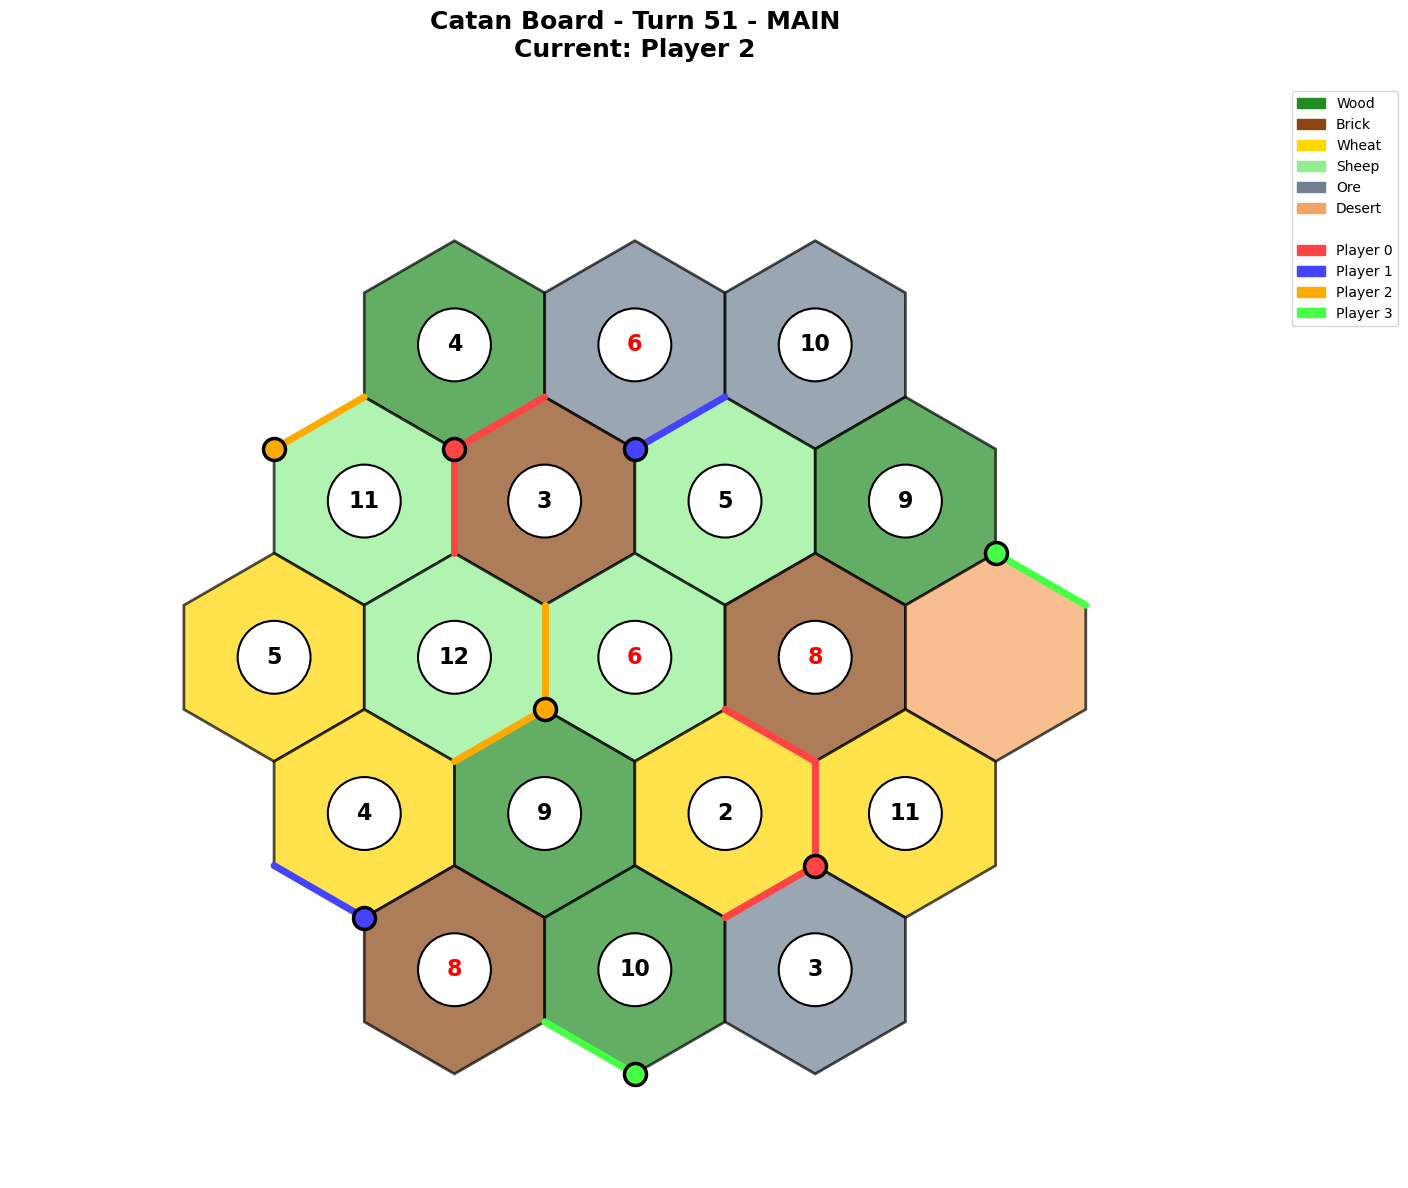

In [10]:
# Visualize the final game state
plot_game_state(game_result)

## 6. Create Another Game for Exploration

You can also create a new game and simulate specific scenarios.

NameError: name 'game2' is not defined

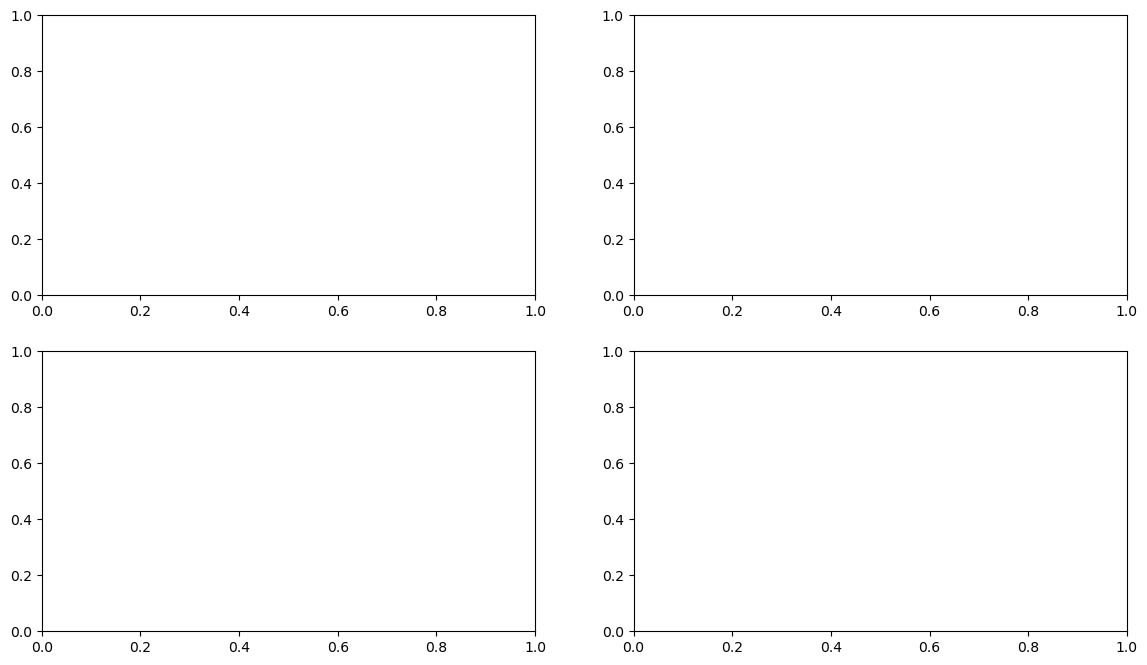

In [11]:
# Plot resources for each player
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, player in enumerate(game2.players):
    plot_player_resources(player, ax=axes[i])

plt.tight_layout()
plt.show()

## 7. Inspect Game State Details

In [ ]:
def plot_player_resources(player, ax=None):
    """Plot a player's resources as a bar chart."""
    import matplotlib.pyplot as plt
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 4))
    
    from game_constants import Resource
    
    # Get all resources
    resource_names = [r.value for r in Resource]
    counts = [player.resources.get(r, 0) for r in Resource]
    
    colors = ['#228B22', '#8B4513', '#FFD700', '#90EE90', '#708090']
    
    bars = ax.bar(resource_names, counts, color=colors, edgecolor='black', linewidth=1.5)
    
    # Add count labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}',
                   ha='center', va='bottom', fontweight='bold')
    
    ax.set_ylabel('Count', fontsize=11, fontweight='bold')
    ax.set_title(f'{player.name} Resources (Total: {player.total_resource_count()})',
                fontsize=12, fontweight='bold')
    ax.set_ylim(0, max(counts + [5]))
    ax.grid(axis='y', alpha=0.3)
    
    return ax

In [ ]:
# Get observation for player 0
obs = game2.get_observation(0)

print("Observation for Player 0:")
print(f"  Phase: {obs['phase']}")
print(f"  Turn: {obs['turn_number']}")
print(f"  Current Player: {obs['current_player_idx']}")
print(f"  Own Resources: {obs['resources']}")
print(f"  Own Victory Points: {obs['victory_points']}")
print(f"\nOpponents:")
for opp in obs['opponents']:
    print(f"  {opp['name']}: {opp['resource_count']} resources, {opp['public_vp']} VP")

Observation for Player 0:
  Phase: GamePhase.SETUP
  Turn: 0
  Current Player: 2
  Own Resources: {<Resource.WOOD: 'wood'>: 0, <Resource.BRICK: 'brick'>: 0, <Resource.WHEAT: 'wheat'>: 0, <Resource.SHEEP: 'sheep'>: 0, <Resource.ORE: 'ore'>: 0}
  Own Victory Points: 0

Opponents:
  Player 1: 0 resources, 0 VP
  Player 2: 0 resources, 0 VP


## 8. Test Dice Rolling and Resource Distribution

In [ ]:
# Create a game in main phase
game3 = GameState(num_players=2)
action_mgr3 = ActionManager(game3)

# Complete setup phase quickly
while game3.phase.name == 'SETUP':
    legal = action_mgr3.get_legal_actions(game3.current_player.player_id)
    if legal:
        import random
        action_mgr3.execute_action(game3.current_player.player_id, random.choice(legal))

print(f"Game Phase: {game3.phase}")
print(f"Starting main game phase...\n")

# Test dice rolling
for turn in range(5):
    print(f"Turn {game3.turn_number}:")
    
    # Roll dice
    roll = game3.roll_dice()
    print(f"  Rolled: {roll}")
    
    # Show resources gained
    for player in game3.players:
        print(f"  {player.name}: {player.total_resource_count()} resources")
    
    # End turn
    game3.next_turn()
    print()

Game Phase: GamePhase.MAIN
Starting main game phase...

Turn 1:
  Rolled: 7
  Player 0: 1 resources
  Player 1: 1 resources

Turn 2:
  Rolled: 4
  Player 0: 1 resources
  Player 1: 2 resources

Turn 3:
  Rolled: 6
  Player 0: 3 resources
  Player 1: 2 resources

Turn 4:
  Rolled: 4
  Player 0: 3 resources
  Player 1: 3 resources

Turn 5:
  Rolled: 7
  Player 0: 3 resources
  Player 1: 3 resources



## Next Steps

- Implement more sophisticated agents (e.g., rule-based, Q-learning, DQN)
- Add port trading functionality
- Implement longest road calculation
- Add player-to-player trading
- Implement all development card actions
- Create training loops for RL agents